# Beam variance

In [58]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's create a fBm and convolve the result with a Gaussian beam of 5 pixels FWHM

In [43]:
from noisegen import fbm2d

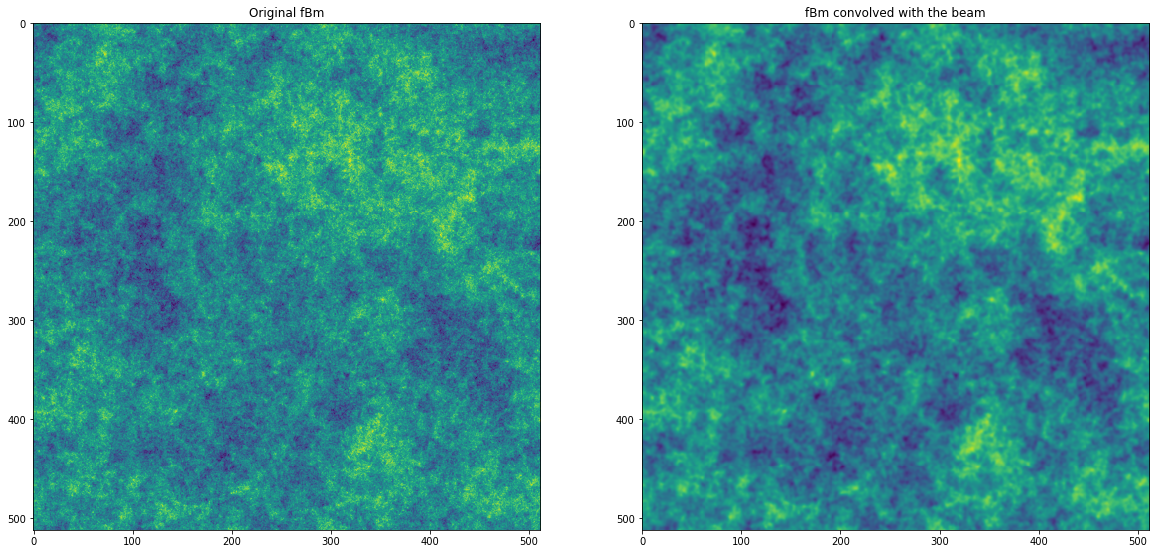

In [44]:
fbm = fbm2d(-2.0,512,512)

FWHM = 3.
fbmB = imsmooth(fbm, FWHM)

figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(fbm)
plt.title("Original fBm")

plt.subplot(1,2,2)
plt.imshow(fbmB)
plt.title("fBm convolved with the beam")

Plot the power spectra

In [45]:
from powspec import powspec

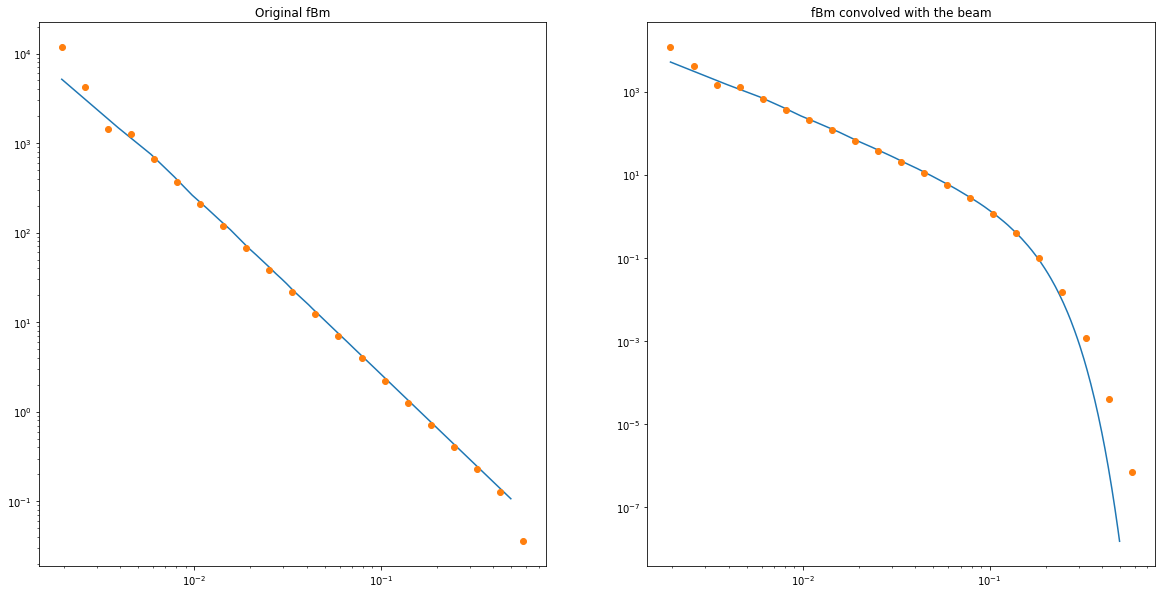

In [60]:
#Functions to calculate the Fourier power spectra
k_fbm, spec_fbm = powspec(fbm, reso=1)
k_fbmB, spec_fbmB = powspec(fbmB, reso=1)

#Functions to calculate the wavelet power spectra
wtfbm, S11afbm, wav_fbm, S1afbm, qfbm = fan_trans(fbm, reso=1, q=0, qdyn=False, pownorm=True)
wtfbmB, S11afbmB, wav_fbmB, S1afbmB, qfbmB = fan_trans(fbmB, reso=1, q=0, qdyn=False, pownorm=True)

figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(k_fbm, spec_fbm)
plt.plot(wav_fbm, S1afbm, 'o')
plt.xscale('log')
plt.yscale('log')
plt.title("Original fBm")

plt.subplot(1,2,2)
plt.plot(k_fbmB, spec_fbmB)
plt.plot(wav_fbmB, S1afbmB, 'o')
plt.xscale('log')
plt.yscale('log')
plt.title("fBm convolved with the beam")

Plot the beam power spectrum

In [47]:
from gauss_beam import gauss_beam

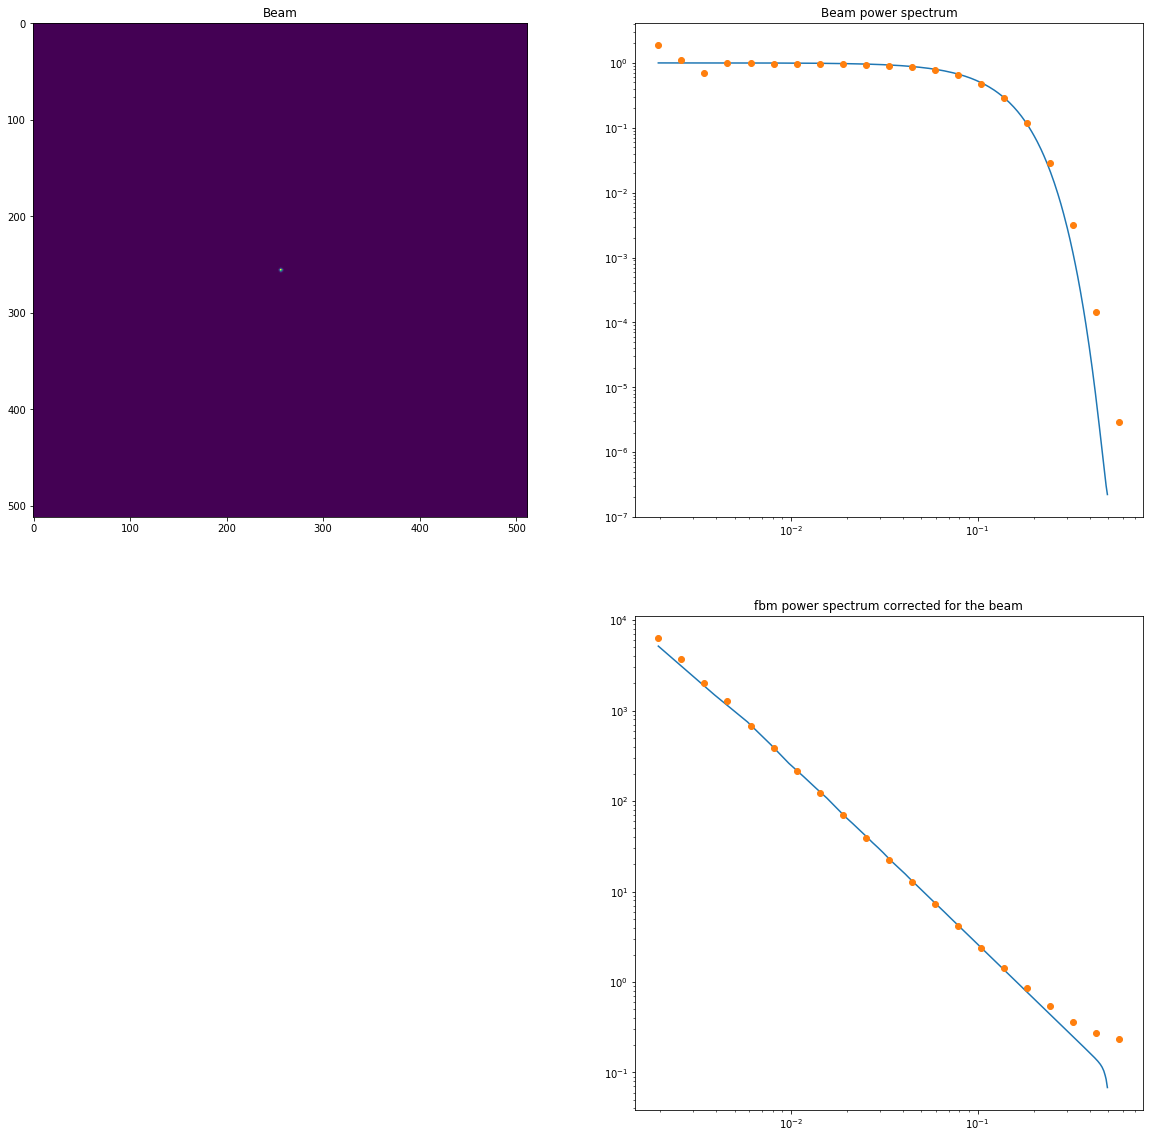

In [63]:
beam = gauss_beam(FWHM,512,512,FWHM=True)
k_beam, spec_beam = powspec(beam, reso=1)
wtbeam, S11abeam, wav_beam, S1abeam, qbeam = fan_trans(beam, reso=1, q=0, qdyn=False, pownorm=True)

#Beam normalisation

spec_beam = spec_beam/spec_beam[0]
S1abeam = S1abeam/S1abeam[3]

figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(beam)
plt.title("Beam")

plt.subplot(2,2,2)
plt.plot(k_beam, spec_beam)
plt.plot(wav_beam,S1abeam,'o')
plt.xscale('log')
plt.yscale('log')
plt.title("Beam power spectrum")

#Beam correction
plt.subplot(2,2,4)
plt.plot(k_fbm, spec_fbmB/spec_beam)
plt.plot(wav_fbmB, S1afbmB/S1abeam,'o')
plt.xscale('log')
plt.yscale('log')
plt.title("fbm power spectrum corrected for the beam")

Now let's look at the $\Delta$-variance spectra for the fBms.

I am using the same Fan wavalet than the one use in the segmentation technique. It is a rotated version of the Morlet wavelet.

Here, to reproduce the $\Delta$-variance, I just removed the normalisation $1/l$ for the transform at each spacial scales.

So just for a test, I should get a flat spectrum for a fBm with a power law of $-2.0$ and a slope of $-2.0$ for noise.

In [49]:
from wavan import fan_trans

Slope = -1.99593995564


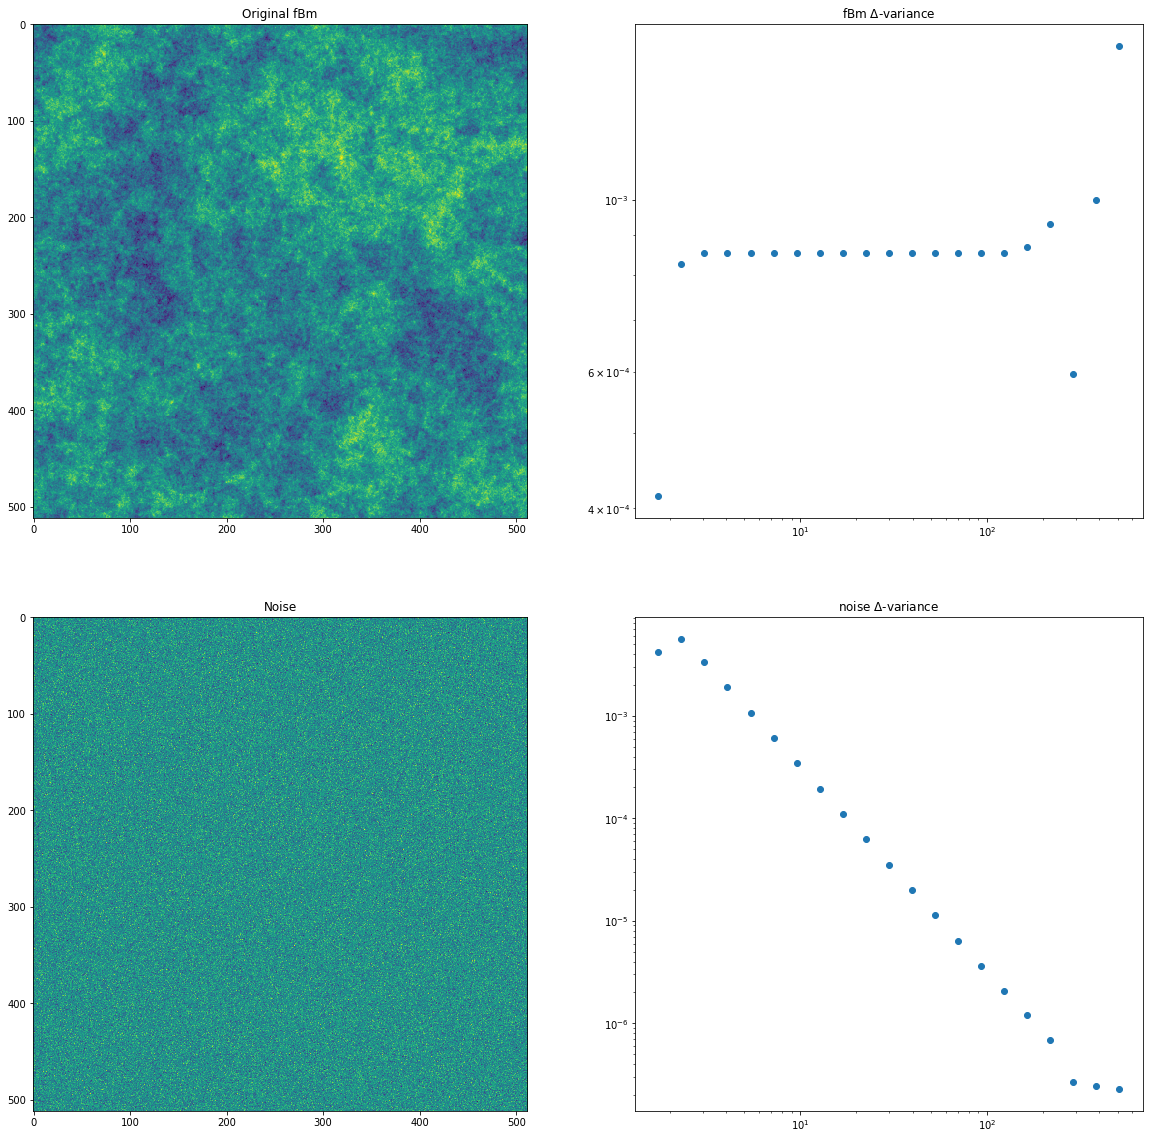

In [64]:
wtf, S11af, wav_kf, S1af, qf = fan_trans(fbm, reso=1, q=0, qdyn=False, pownorm=False)

figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(fbm)
plt.title("Original fBm")

plt.subplot(2,2,2)
plt.plot(1./wav_kf, S1af,'o')
plt.xscale('log')
plt.yscale('log')
plt.title("fBm $\Delta$-variance")

#For noise only
noise = fbm2d(0.,512,512)
wtn, S11an, wav_kn, S1an, qn = fan_trans(noise, reso=1, q=0, qdyn=False, pownorm=False)

plt.subplot(2,2,3)
plt.imshow(noise)
plt.title("Noise")

plt.subplot(2,2,4)
plt.plot(1./wav_kn, S1an,'o')
plt.xscale('log')
plt.yscale('log')
plt.title("noise $\Delta$-variance")

#Power law fit
coef,cov = np.polyfit(np.log(1./wav_kn[3:19]),np.log(S1an[3:19]),deg=1,cov=True)
print "Slope =", coef[0]

Now let's look at the $\Delta$-variance spectrum for the fBm convolved with the beam.

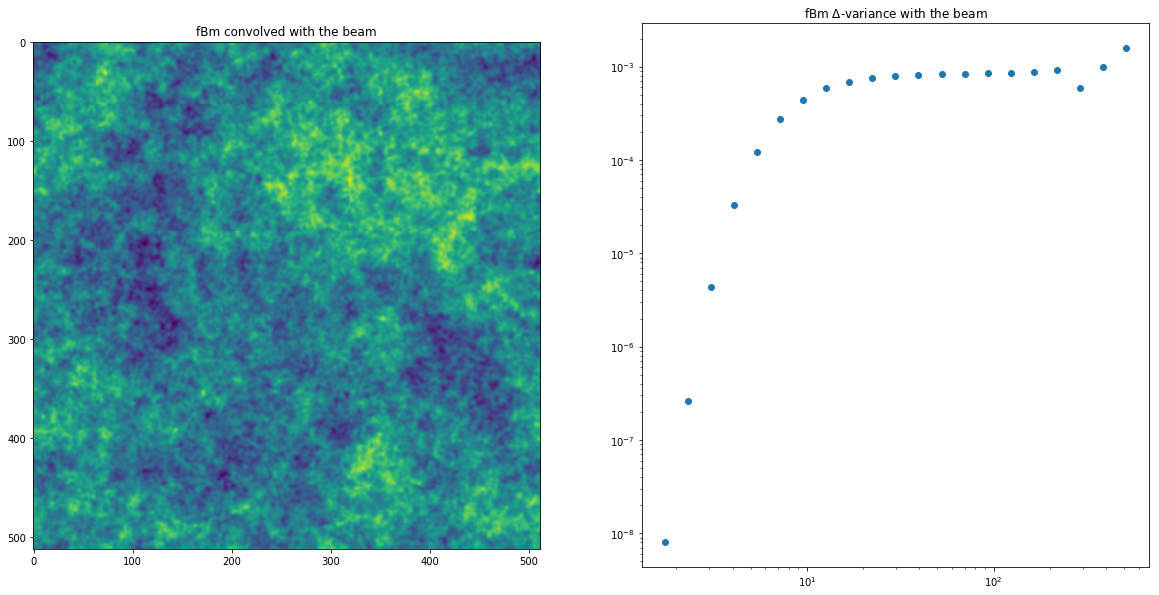

In [65]:
wtfB, S11afB, wav_kfB, S1afB, qfB = fan_trans(fbmB, reso=1, q=0, qdyn=False, pownorm=False)

figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(fbmB)
plt.title("fBm convolved with the beam")

plt.subplot(1,2,2)
plt.plot(1./wav_kfB, S1afB,'o')
plt.xscale('log')
plt.yscale('log')
plt.title("fBm $\Delta$-variance with the beam")

If I divide this spectrum with the power spectrum of the beam.

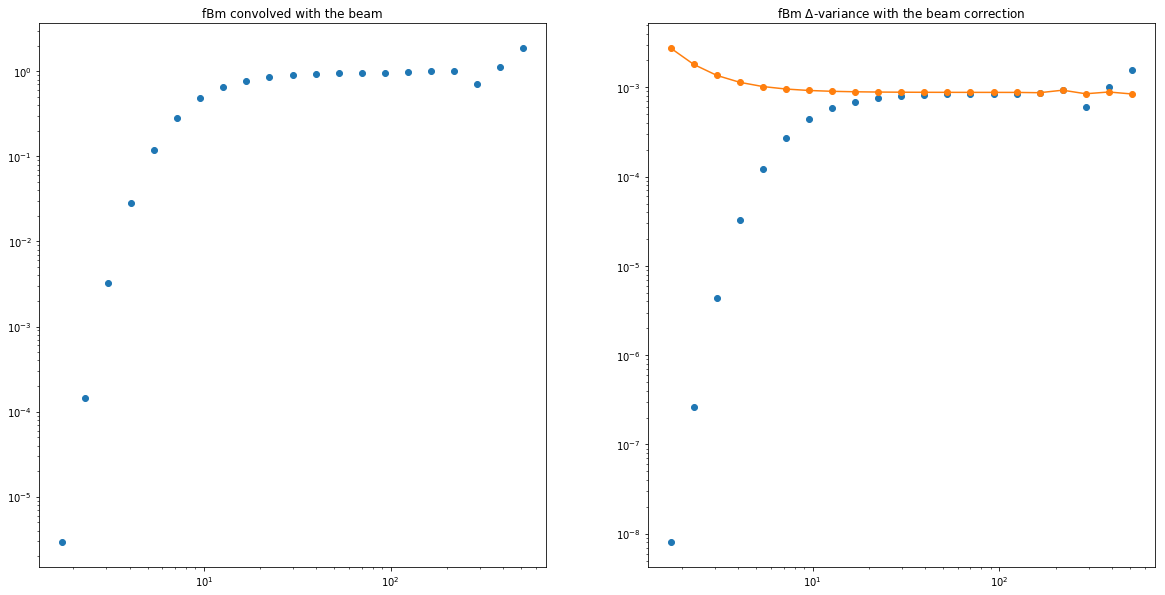

In [66]:
wtbeam, S11abeam, wav_kbeam, S1abeam, qbeam = fan_trans(beam, reso=1, q=0, qdyn=False, pownorm=True)

#Normalisation of the beam
S1abeam = S1abeam/S1abeam[3]

figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(1./wav_kbeam, S1abeam,'o')
plt.xscale('log')
plt.yscale('log')
plt.title("fBm convolved with the beam")

plt.subplot(1,2,2)
plt.plot(1./wav_kfB, S1afB,'o')
plt.xscale('log')
plt.yscale('log')
plt.title("fBm $\Delta$-variance with the beam correction")
plt.plot(1./wav_kfB, S1afB/S1abeam,marker='o')